In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Import essential models and functions from sklearn - M3
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Import essential models and functions from sklearn - M4
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

In [8]:
# Importing Data
airbnbListings = pd.read_csv('seattle/listings.csv')
airbnbListings.head()

# Create a copy of the Dataset
airbnbListings_clean = airbnbListings.copy()

# Convert all Variable Names to UPPERCASE
airbnbListings_clean.columns = airbnbListings_clean.columns.str.upper()

# Remove all spaces and dots from Variable Names
airbnbListings.columns = airbnbListings_clean.columns.str.replace(".","")
airbnbListings_clean.columns = airbnbListings_clean.columns.str.replace(" ","_")

# Print the Variable Information to check
airbnbListings_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                3818 non-null   int64  
 1   LISTING_URL                       3818 non-null   object 
 2   SCRAPE_ID                         3818 non-null   float64
 3   LAST_SCRAPED                      3818 non-null   object 
 4   NAME                              3818 non-null   object 
 5   SUMMARY                           3641 non-null   object 
 6   SPACE                             3249 non-null   object 
 7   DESCRIPTION                       3818 non-null   object 
 8   EXPERIENCES_OFFERED               3818 non-null   object 
 9   NEIGHBORHOOD_OVERVIEW             2786 non-null   object 
 10  NOTES                             2212 non-null   object 
 11  TRANSIT                           2884 non-null   object 
 12  THUMBN

In [4]:
listingdata = pd.read_csv('listings.csv')
listingdata.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
superhostdata = listingdata.loc[:,listingdata.columns.intersection(["host_is_superhost"])]
superhostdata.head()

,host_is_superhost
0,f
1,t
2,f
3,f
4,f


In [6]:
locationdata_clean = listingdata.loc[:,listingdata.columns.intersection(["latitude","longitude"])]
locationdata_clean.head()

,latitude,longitude
0,47.636289,-122.371025
1,47.639123,-122.365666
2,47.629724,-122.369483
3,47.638473,-122.369279
4,47.632918,-122.372471


In [7]:
pricedata = listingdata.loc[:,listingdata.columns.intersection(["price", "weekly_price", "monthly_price"])]
pricedata.head()

,price,weekly_price,monthly_price
0,$85.00,NaN,NaN
1,$150.00,"$1,000.00","$3,000.00"
2,$975.00,NaN,NaN
3,$100.00,$650.00,"$2,300.00"
4,$450.00,NaN,NaN


In [8]:
reviewsdata = listingdata.loc[:,listingdata.columns.intersection(["reviews_per_month"])]
reviewsdata.head()

,reviews_per_month
0,4.07
1,1.48
2,1.15
3,NaN
4,0.89


In [9]:
# Check missing values in data
pricedata.isnull().sum()

# Fill missing values in data
pricedata["price"].fillna(value = "$0.00", inplace = True)
pricedata["weekly_price"].fillna(value = "$0.00", inplace = True)
pricedata["monthly_price"].fillna(value = "$0.00", inplace = True)

# Check the Clean Dataset
pricedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   price          3818 non-null   object
 1   weekly_price   3818 non-null   object
 2   monthly_price  3818 non-null   object
dtypes: object(3)
memory usage: 44.8+ KB


In [10]:
# Check the Variable Information
print(pricedata["price"].dropna().value_counts())
print(pricedata["price"].dtypes)

$150.00    162
$100.00    159
$75.00     118
$99.00     110
$95.00     110
          ... 
$999.00      1
$545.00      1
$480.00      1
$557.00      1
$465.00      1
Name: price, Length: 273, dtype: int64
object


In [11]:
# Check the Variable Information
print(pricedata["weekly_price"].dropna().value_counts())

$0.00        1809
$500.00        94
$600.00        85
$1,000.00      70
$450.00        68
             ... 
$290.00         1
$571.00         1
$409.00         1
$329.00         1
$1,148.00       1
Name: weekly_price, Length: 396, dtype: int64


In [12]:
print(pricedata["monthly_price"].dropna().value_counts())

$0.00        2301
$2,500.00      66
$3,000.00      53
$2,000.00      52
$1,500.00      50
             ... 
$1,664.00       1
$7,350.00       1
$1,525.00       1
$2,290.00       1
$8,979.00       1
Name: monthly_price, Length: 357, dtype: int64


In [13]:
pricedata["price"] = pricedata.price.str.replace('$',' ').str.replace(',','').astype('float64')

In [14]:
pricedata["weekly_price"] = pricedata.weekly_price.str.replace('$',' ').str.replace(',','').astype('float64')

In [15]:
pricedata["monthly_price"] = pricedata.monthly_price.str.replace('$',' ').str.replace(',','').astype('float64')

In [16]:
print(pricedata.dtypes)

price            float64
weekly_price     float64
monthly_price    float64
dtype: object


In [17]:
print(pricedata["price"])

0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64


In [18]:
superhostdata.isnull().sum()
print(superhostdata["host_is_superhost"].dropna().value_counts())

f    3038
t     778
Name: host_is_superhost, dtype: int64


In [19]:
# Fill missing values in data
superhostdata["host_is_superhost"].fillna(value = "f", inplace = True)

superhostdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   host_is_superhost  3818 non-null   object
dtypes: object(1)
memory usage: 15.0+ KB


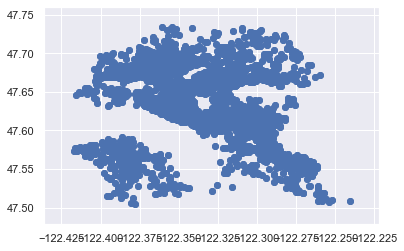

In [22]:
#Write code below

latitude=[]
longitude = []

for row in locationdata_clean:
    lat = locationdata_clean['latitude']
    long = locationdata_clean['longitude']
    
    latitude.append(lat)
    longitude.append(long)
    
plt.scatter(longitude,latitude)

plt.show()

In [275]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
locationdata_clean_train, locationdata_clean_test, superhostdata_train, superhostdata_test = train_test_split(locationdata_clean, superhostdata, test_size = 0.25)

# Check the sample sizes
print("Train Set :", superhostdata_train.shape, locationdata_clean_train.shape)
print("Test Set  :", superhostdata_test.shape, locationdata_clean_test.shape)

Train Set : (2863, 1) (2863, 2)
Test Set  : (955, 1) (955, 2)


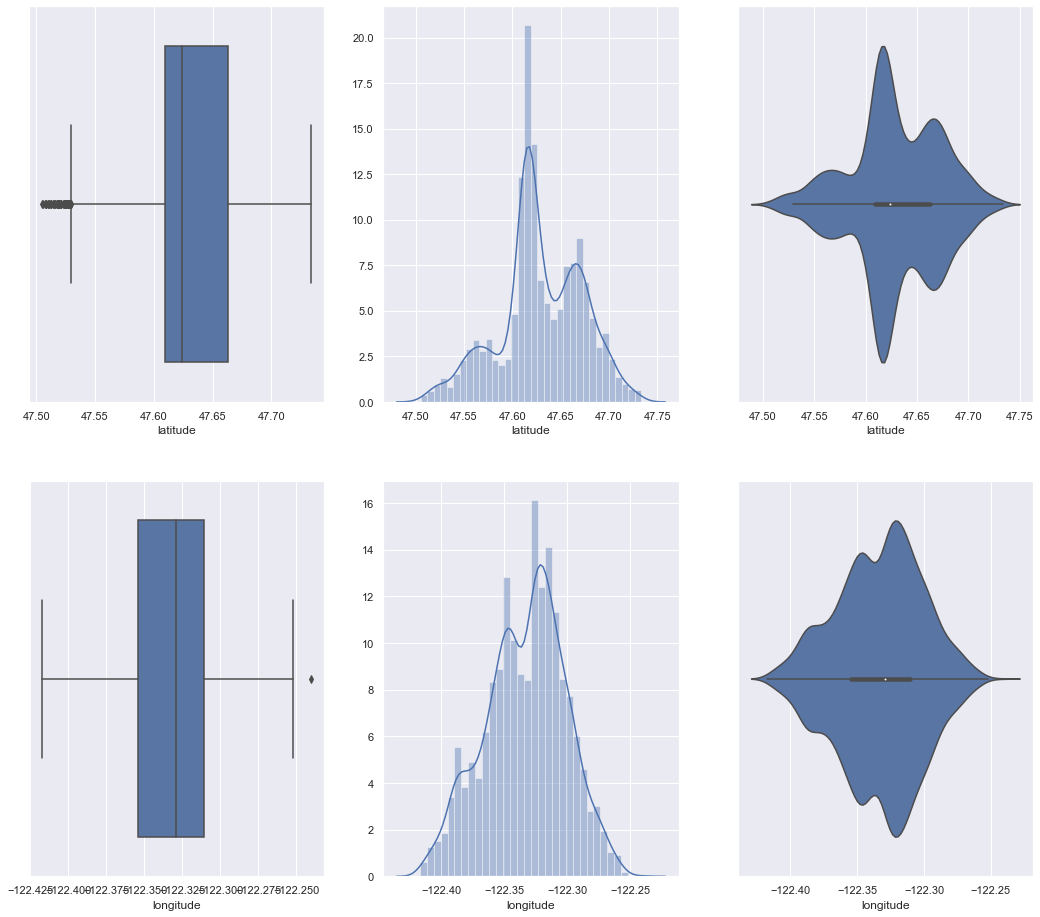

In [276]:
f, axes = plt.subplots(2, 3, figsize=(18, 16))

count = 0
for var in locationdata_clean:
    sb.boxplot(locationdata_clean[var], orient = "h", ax = axes[count,0])
    sb.distplot(locationdata_clean[var], ax = axes[count,1])
    sb.violinplot(locationdata_clean[var], ax = axes[count,2])
    count += 1

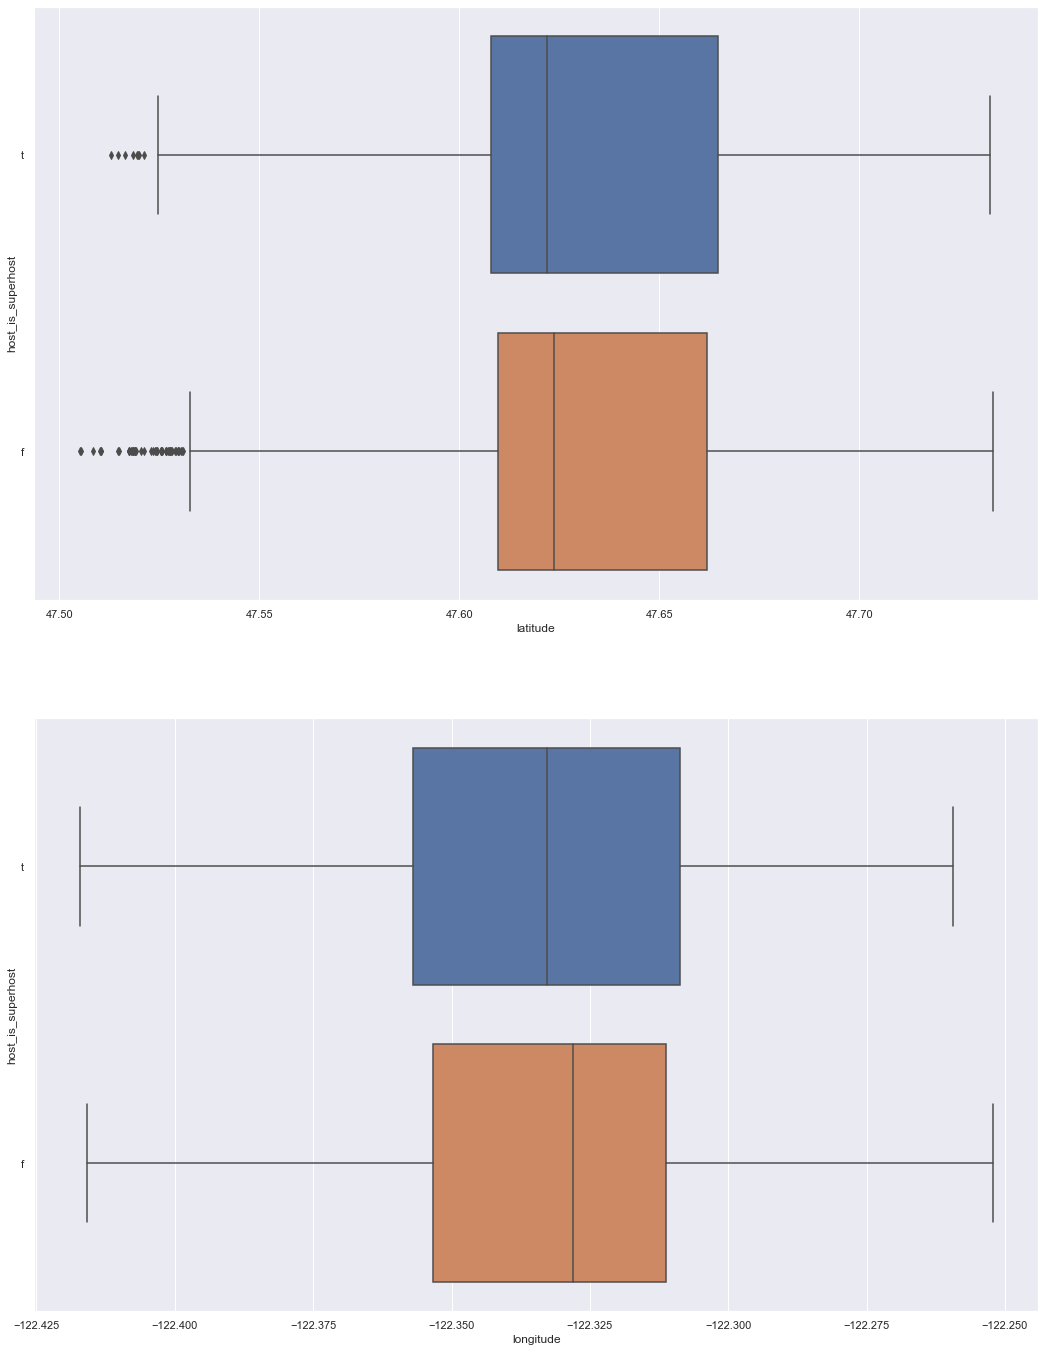

In [280]:
# Relationship between Response and the Predictors
trainDF = pd.concat([superhostdata_train, locationdata_clean_train.reindex(index=superhostdata_train.index)], sort = False, axis = 1)

f, axes = plt.subplots(2, 1, figsize=(18, 24))

count = 0
for var in locationdata_clean_train:
    sb.boxplot(x = var, y = "host_is_superhost", data = trainDF, orient = "h", ax = axes[count])
    count += 1

In [255]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
pricedata_train, pricedata_test, superhostdata_train, superhostdata_test = train_test_split(pricedata, superhostdata, test_size = 0.25)

# Check the sample sizes
print("Train Set :", superhostdata_train.shape, pricedatat_train.shape)
print("Test Set  :", superhostdata_test.shape, pricedatat_test.shape)

Train Set : (2863, 1) (2863, 3)
Test Set  : (955, 1) (955, 3)


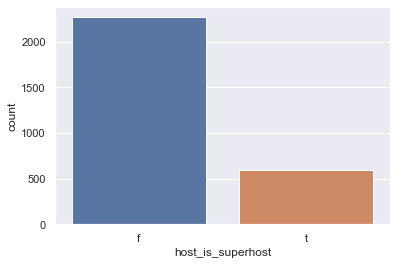

In [256]:
sb.countplot(superhostdata_train["host_is_superhost"])

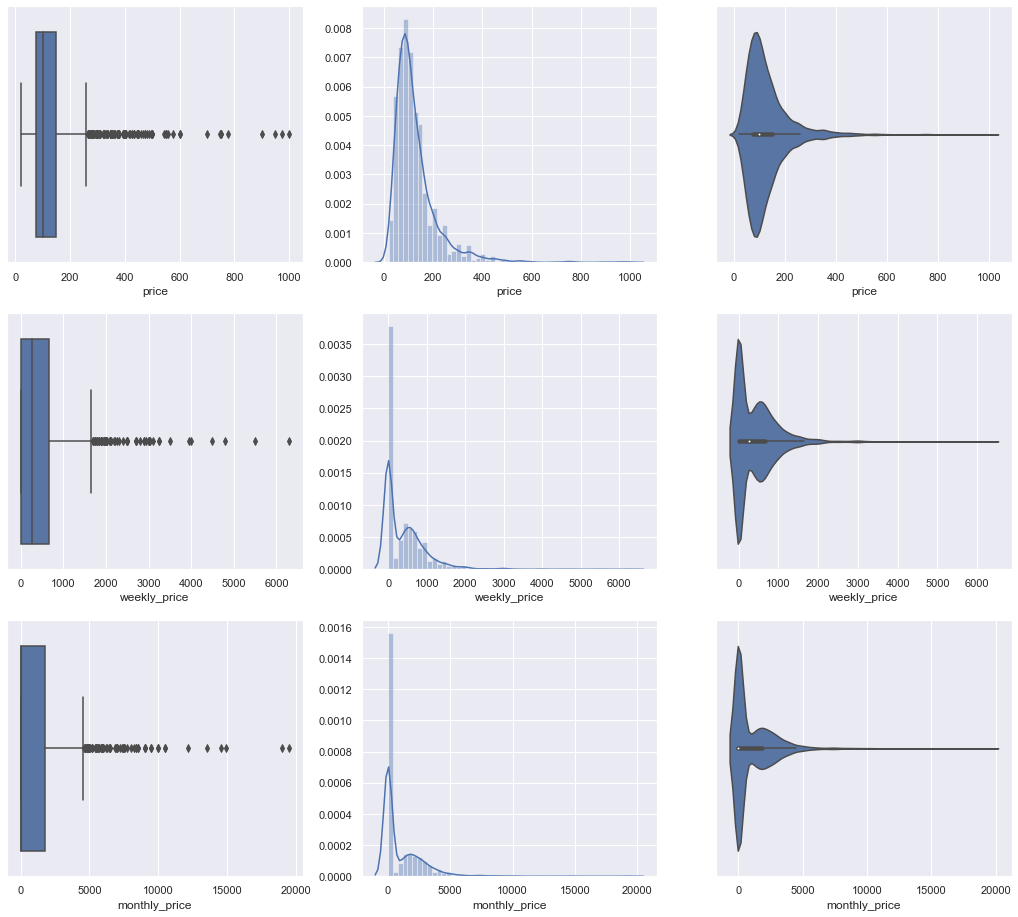

In [266]:
# Draw the distributions of all Predictors in the train set
f, axes = plt.subplots(3, 3, figsize=(18, 16))

count = 0
for var in pricedata_train:
    sb.boxplot(pricedata_train[var], orient = "h", ax = axes[count,0])
    sb.distplot(pricedata_train[var], ax = axes[count,1])
    sb.violinplot(pricedata_train[var], ax = axes[count,2])
    count += 1

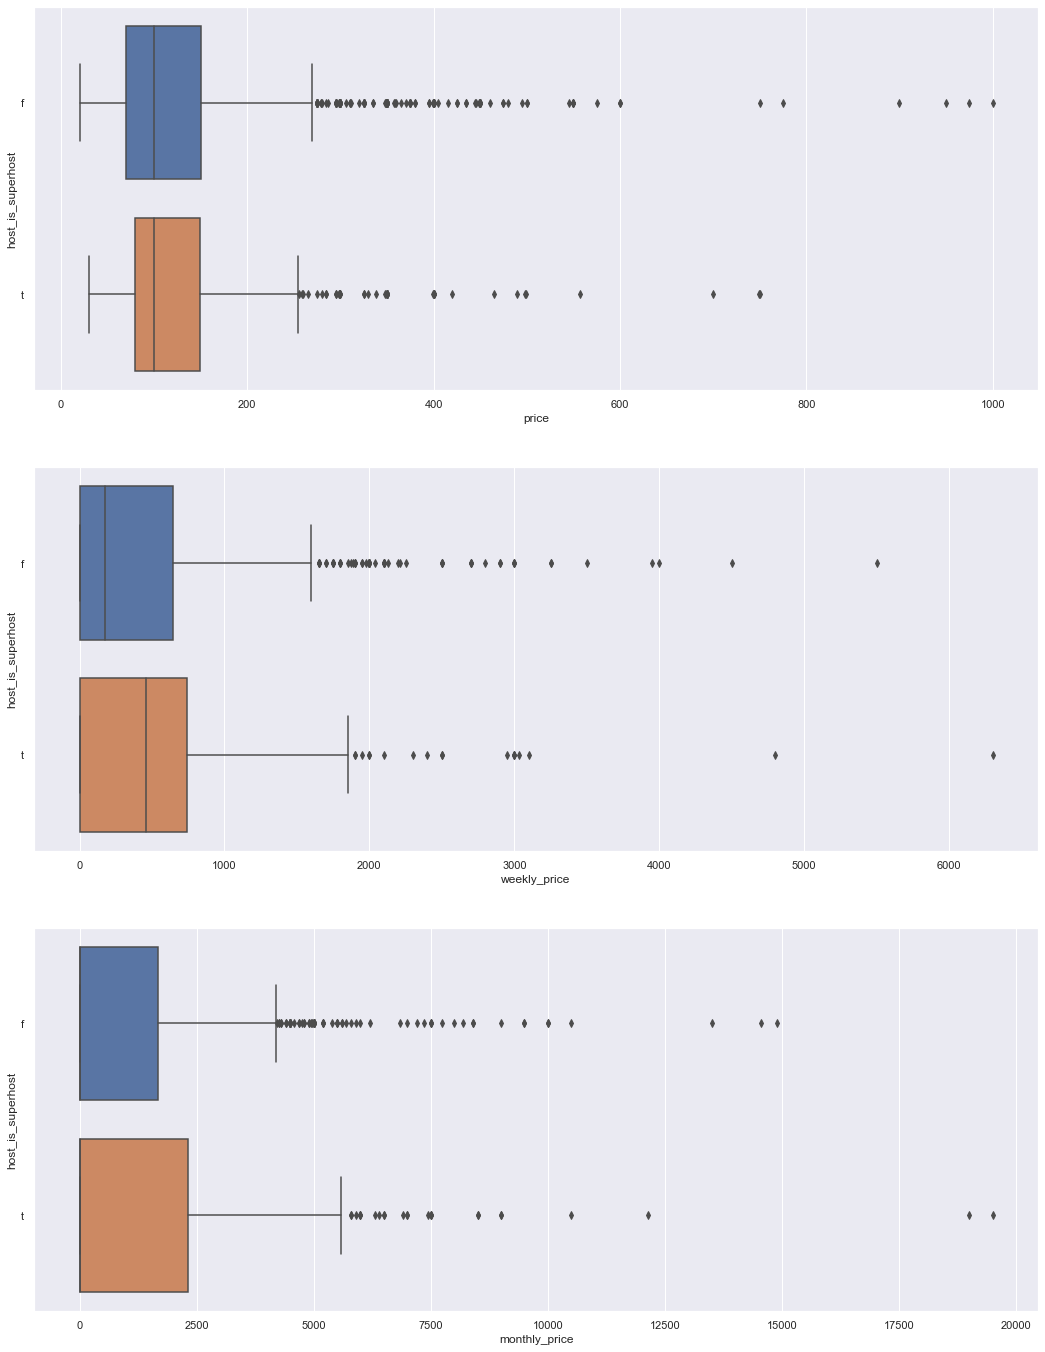

In [262]:
# Relationship between Response (superhostdata) and the Predictors (pricedata) in train data set
trainDF = pd.concat([superhostdata_train, pricedata_train.reindex(index=superhostdata_train.index)], sort = False, axis = 1)

f, axes = plt.subplots(3, 1, figsize=(18, 24))

count = 0
for var in pricedata_train:
    sb.boxplot(x = var, y = superhostdata["host_is_superhost"], data = trainDF, orient = "h", ax = axes[count])
    count += 1

In [263]:
pricedata.describe()

,price,weekly_price,monthly_price
count,3818.000000,3818.000000,3818.000000
mean,127.976166,414.892614,1038.352803
std,90.250022,551.477118,1677.470398
min,20.000000,0.000000,0.000000
25%,75.000000,0.000000,0.000000
50%,100.000000,262.000000,0.000000
75%,150.000000,671.500000,1890.000000
max,1000.000000,6300.000000,19500.000000


In [267]:
# Import DecisionTreeClassifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 5)  # create the decision tree object
dectree.fit(pricedata_train, superhostdata_train)                    # train the decision tree model

# Plot the Decision Tree
from sklearn.tree import export_graphviz
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = pricedata_train.columns,      # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

import graphviz
graphviz.Source(treedot)

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7925253230876703

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8073298429319372



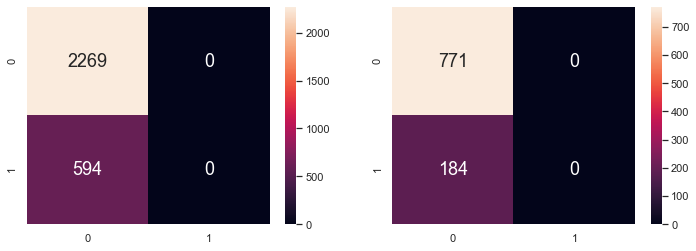

In [264]:
# Predict Legendary values corresponding to Total
superhostdata_train_pred = dectree.predict(pricedata_train)
superhostdata_test_pred = dectree.predict(pricedata_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(pricedata_train, superhostdata_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(pricedata_test, superhostdata_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(superhostdata_train, superhostdata_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(superhostdata_test, superhostdata_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [36]:
reviewscoresratingdata = listingdata.loc[:,listingdata.columns.intersection(["review_scores_rating"])]

In [37]:
neibourhoodgrpcleandata = listingdata.loc[:,listingdata.columns.intersection(["neighbourhood_group_cleansed"])]

In [38]:
reviewscoresratingdata.isnull().sum()

review_scores_rating    647
dtype: int64

In [39]:
neibourhoodgrpcleandata.isnull().sum()

neighbourhood_group_cleansed    0
dtype: int64

In [44]:
rsrdata_clean = reviewscoresratingdata.dropna(subset=['review_scores_rating'])

In [45]:
rsrdata_clean.isnull().sum()

review_scores_rating    0
dtype: int64

In [ ]:
sb.catplot(y = rsrdata_clean, data = pkmndata, col = 'Generation', kind = 'count', col_wrap = 2, height = 8)

In [47]:
worddata_clean = listingdata.loc[:, listingdata.columns.intersection(['room_type','neighbourhood_group_cleansed','latitude', 'longitude'
                                                                     , 'price','review_scores_location'])]
worddata_clean

,neighbourhood_group_cleansed,latitude,longitude,room_type,price,review_scores_location
0,Queen Anne,47.636289,-122.371025,Entire home/apt,$85.00,9.0
1,Queen Anne,47.639123,-122.365666,Entire home/apt,$150.00,10.0
2,Queen Anne,47.629724,-122.369483,Entire home/apt,$975.00,10.0
3,Queen Anne,47.638473,-122.369279,Entire home/apt,$100.00,NaN
4,Queen Anne,47.632918,-122.372471,Entire home/apt,$450.00,9.0
...,...,...,...,...,...,...
3813,Other neighborhoods,47.664295,-122.359170,Entire home/apt,$359.00,10.0
3814,Capitol Hill,47.649552,-122.318309,Entire home/apt,$79.00,10.0
3815,Rainier Valley,47.508453,-122.240607,Entire home/apt,$93.00,NaN
3816,Capitol Hill,47.632335,-122.275530,Entire home/apt,$99.00,NaN


In [2]:
reviewsdata = pd.read_csv('seattle/reviews.csv')

In [3]:
comments = reviewsdata.loc[:,reviewsdata.columns.intersection(['comments'])]

In [35]:
comments = pd.DataFrame(reviewsdata['comments'])
comments.describe()

,comments
count,84831
unique,84136
top,The host canceled this reservation the day before arrival. This is an automated posting.
freq,57


In [5]:
comments.isnull().sum()

comments    18
dtype: int64

In [6]:
comments_clean = comments.dropna()

In [7]:
comments_clean.isnull().sum()

comments    0
dtype: int64

In [8]:
comments_clean.dtypes

comments    object
dtype: object

In [9]:
pd.set_option('display.max_colwidth', None)

In [36]:
#pd.set_option('display.max_rows', None)

In [31]:
comments_clean = comments.comments.str.replace('[^\w\s]','').replace(',','').replace('.','').replace('-','')

In [37]:
comments_clean.describe()

count                                                                                      84831
unique                                                                                     84106
top       The host canceled this reservation the day before arrival This is an automated posting
freq                                                                                          57
Name: comments, dtype: object

In [12]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Kurai
[nltk_data]     Sora\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Kurai
[nltk_data]     Sora\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [38]:
from nltk.corpus import stopwords

In [39]:
# Load stop words
stop_words = stopwords.words('english')

In [40]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [83]:
#words = word_tokenize(str(comments_clean[]))
words = []
for x in comments_clean:
    for y in word_tokenize(str(x)):
        words.insert(len(words),y)
        #print(y)
    #print(len(word_tokenize(x)))
    
#print(words)
          
#words = words.append(str(comments_clean[]))

MemoryError: 

In [76]:
words = []
for line in comments_clean:
    words += word_tokenize(line)

MemoryError: 

In [44]:
newStopwords = ["comments","dean",".","issue","would","find","Needle"," ","wish","easy","good","spent","everything","building","Jon","hosts","cozy","Cute","Perfect","Seattle","Rachel","host","0","1","2","3","4","5","6","7","-","8","9", "seattle", "room","bed","home","two", "need", "bedroom", "apartment", "like", "street", "one", "kitchen", "bathroom","dean","Kelly", "great", "stay", "place", "de","Th" ,"x","]","columns","rows","84831","[","1","house", "place", "will", "felt", "time", "well", "around", "airbnb", "day", "next",":","really", "time","dose", "just", "also","...",",",".","I","!","Very","bnb","'s","The","the","&","It","We"]

In [45]:
stop_words.extend(newStopwords)

In [20]:
word_cleaned = [word for word in words if word not in stop_words]

In [21]:
lowerwords = [x.lower() for x in word_cleaned]

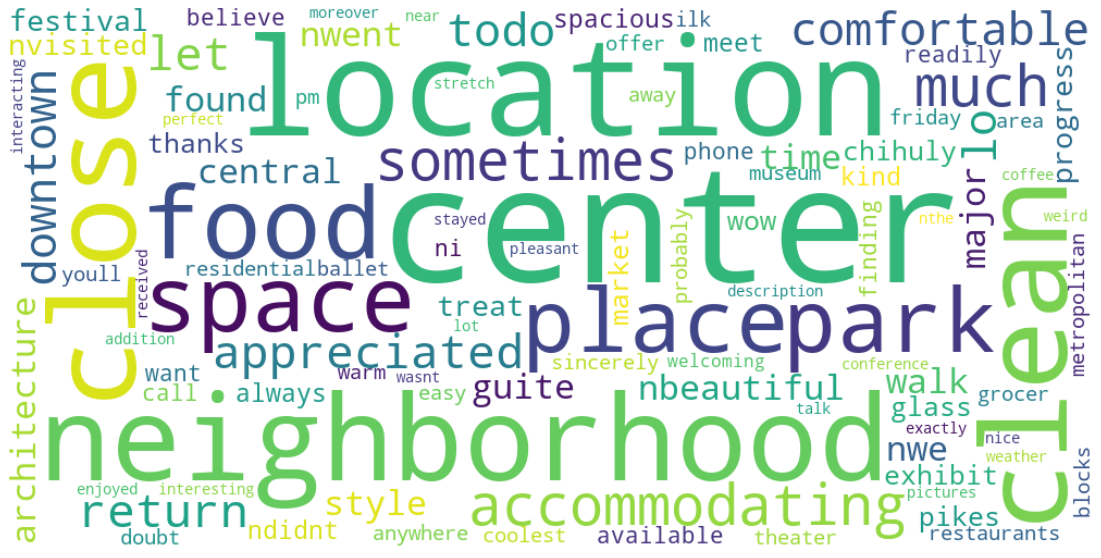

In [26]:
from wordcloud import WordCloud, ImageColorGenerator
wc = WordCloud(max_font_size=150, max_words=100, background_color="white", width = 1000, height = 500)
img = wc.generate_from_text(' '.join(lowerwords))
plt.imshow(img, interpolation='bilinear')
plt.axis("off")
plt.show()

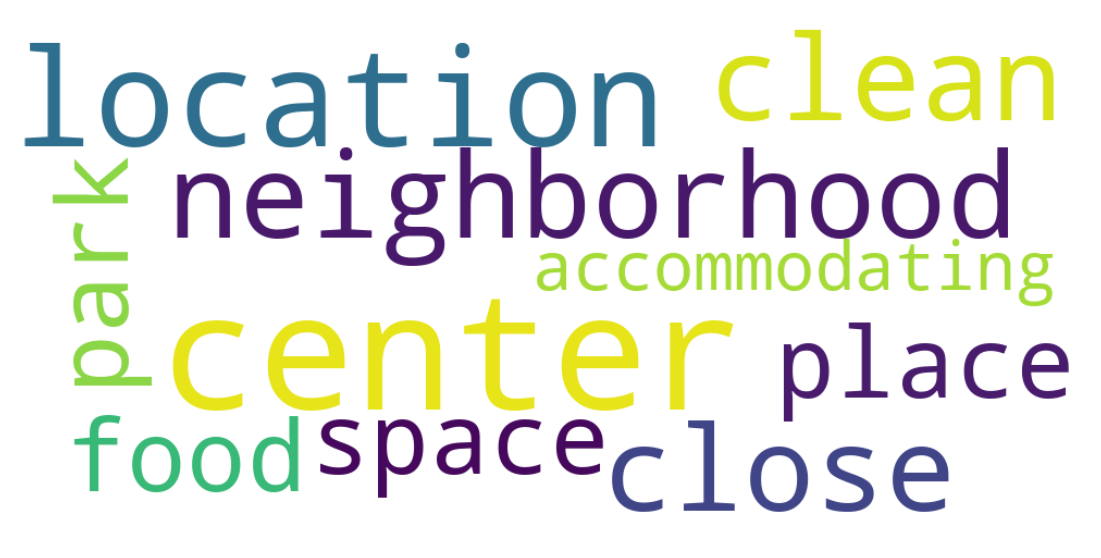

In [28]:
from wordcloud import WordCloud, ImageColorGenerator
wc = WordCloud(max_font_size=150, max_words=10, background_color="white", width = 1000, height = 500)
img = wc.generate_from_text(' '.join(lowerwords))
plt.imshow(img, interpolation='bilinear')
plt.figure
plt.axis("off")
plt.show()

In [24]:
import collections
counted_words = collections.Counter(lowerwords)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

<BarContainer object of 10 artists>

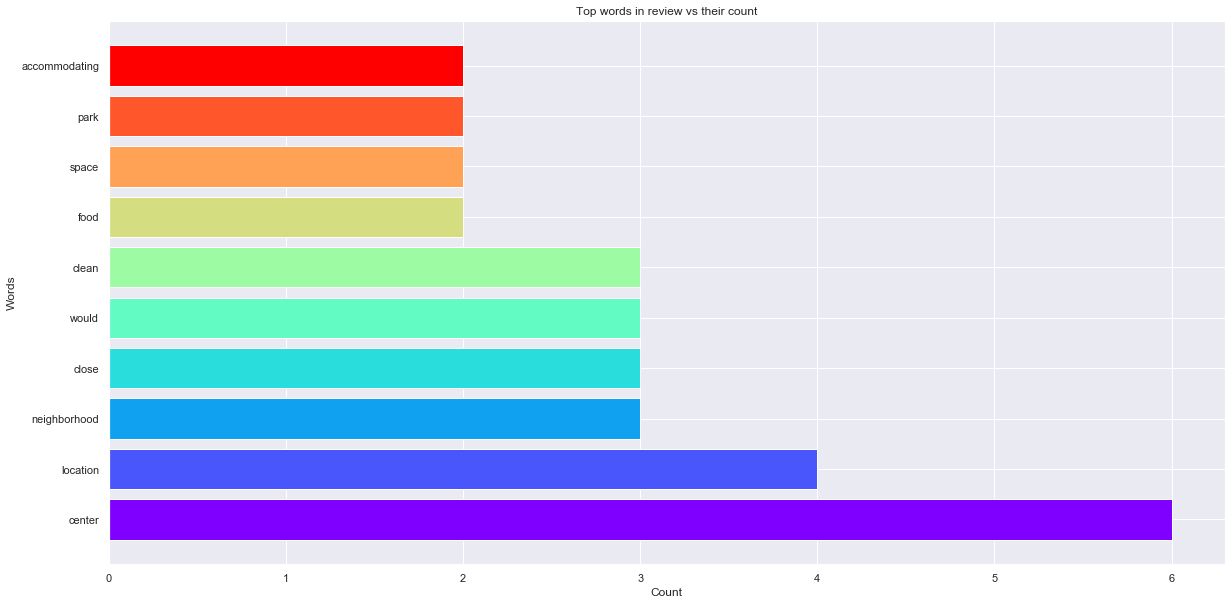

In [25]:
import matplotlib.cm as cm
from matplotlib import rcParams
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in review vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

In [32]:
from wordcloud import WordCloud, ImageColorGenerator
wc = WordCloud(max_font_size=100, max_words=100, background_color="white")
img = wc.generate_from_text(' '.join(word_cleaned))

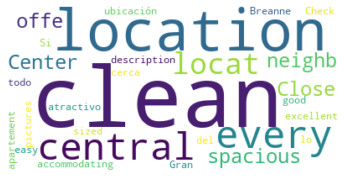

In [159]:
plt.imshow(img, interpolation='bilinear')
plt.axis("off")
plt.show()

In [123]:
freq = nltk.FreqDist(word_cleaned)

In [124]:
freq.most_common(3)

[('clean', 2), ('location', 1), ('everyt', 1)]